In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from pprint import pprint
import itertools

import cp
import base
from parafac2 import parafac2_als
import utils

%matplotlib notebook

## Load data

In [2]:
X = loadmat('datasets/gcwine.mat')['gcwine']['data'][0][0]
#X = X/np.linalg.norm(X)
X_list = [X[..., k] for k in range(X.shape[-1])]
#X_list = [X[k] for k in range(X.shape[-1])]

## Decompose with PARAFAC2

In [3]:
P_k, F, A, D_k = parafac2_als(X_list, 3, convergence_th= 1e-20)

   0: loss is 399897120172919029760.00, improvement is -19708.22
  50: loss is 3649354612407245312.00, improvement is 0.99
 100: loss is 3809617058411427.50, improvement is 1.00
 150: loss is 1608091315493511.75, improvement is 1.00
 200: loss is 1600143100372771.00, improvement is 1.00
 250: loss is 1599147236345446.00, improvement is 1.00
 300: loss is 1599094691116951.75, improvement is 1.00
 350: loss is 1599178223611498.00, improvement is 1.00
 400: loss is 1599249607640120.75, improvement is 1.00
 450: loss is 1599293786133003.50, improvement is 1.00
 500: loss is 1599318488650654.25, improvement is 1.00
 550: loss is 1599331724278371.75, improvement is 1.00
 600: loss is 1599338676096842.00, improvement is 1.00
 650: loss is 1599342292306027.75, improvement is 1.00
 700: loss is 1599344164694916.25, improvement is 1.00
 750: loss is 1599345132316693.75, improvement is 1.00
 800: loss is 1599345632302697.00, improvement is 1.00
 850: loss is 1599345891059553.00, improvement is 1.

## Plot A

<IPython.core.display.Javascript object>


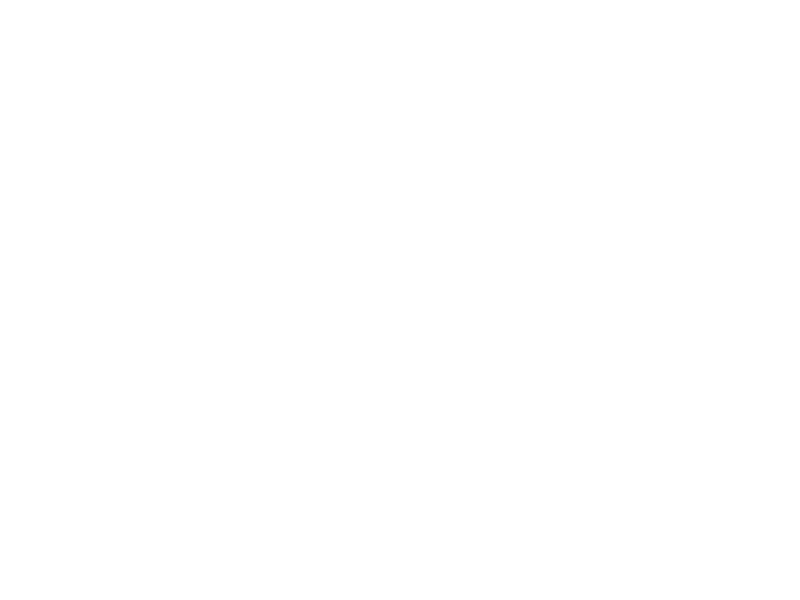

In [4]:
plt.figure()
plt.plot(A)
plt.show()

## Plot B

<IPython.core.display.Javascript object>


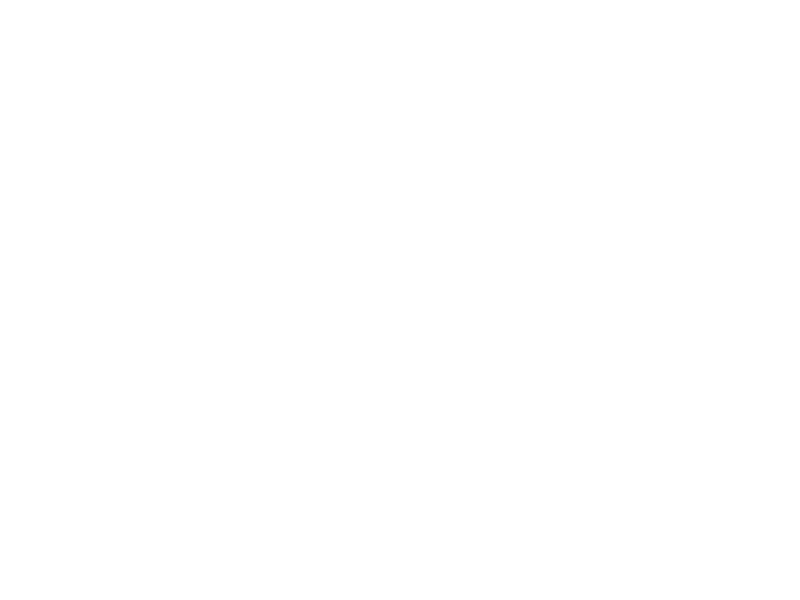

In [5]:
C = np.diagonal(D_k)
plt.figure()
plt.plot(C)
plt.show()

## Plot first F_k slice

<IPython.core.display.Javascript object>


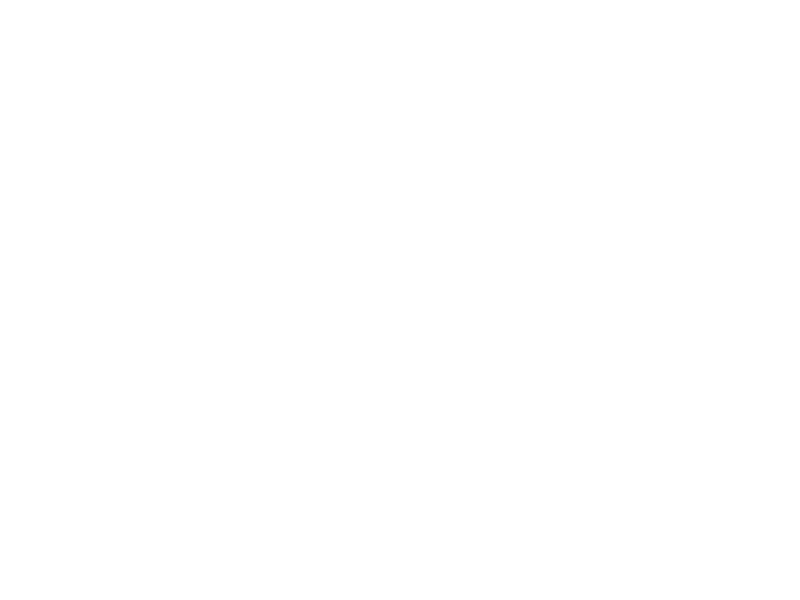

In [6]:
F_k = [P @ F for P in P_k]
plt.figure()
plt.plot(F_k[0])
plt.show()

## Plot them together

In [7]:
%matplotlib notebook

<IPython.core.display.Javascript object>


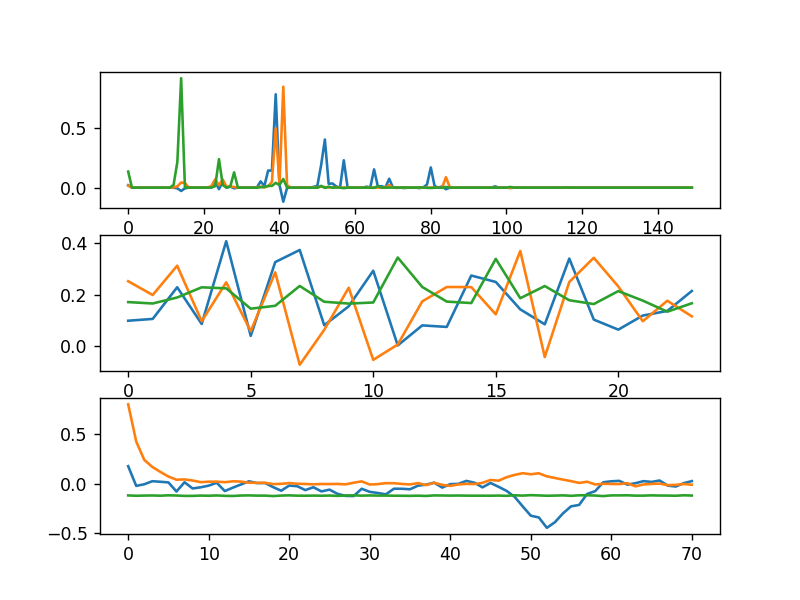

Widget Javascript not detected.  It may not be installed or enabled properly.


In [8]:
fig, ax = plt.subplots(3, 1)

from ipywidgets import interact, interactive, fixed, interact_manual

(A_, C_), *_ = utils.prepare_for_comparison((A, C))

ax[0].plot(A_)
ax[1].plot(C_)

@interact(k=(0,len(F_k)-1))
def plot_F(k):
    #(F_k_,), *_ = utils.prepare_for_comparison((F_k[k],))
    ax[2].clear()
    ax[2].plot(F_k[k])